In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time

In [2]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

## Articles data

In [3]:
articles = pd.read_csv('articles.csv.zip')

In [4]:
articles[:5]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
articles.index_name.unique()

array(['Ladieswear', 'Lingeries/Tights', 'Baby Sizes 50-98', 'Menswear',
       'Ladies Accessories', 'Sport', 'Children Sizes 92-140', 'Divided',
       'Children Sizes 134-170', 'Children Accessories, Swimwear'],
      dtype=object)

In [7]:
articles.shape

(105542, 25)

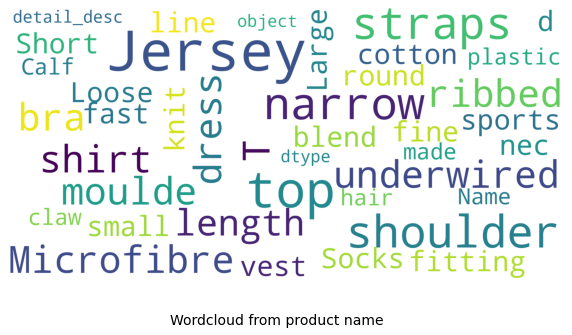

In [8]:
show_wordcloud(articles['detail_desc'], 'Wordcloud from product name')

Seems like each variables "_no" or "_id" or "_code" correspond to the "_name" <br>
Drop all column with "_no", "_id", "_code" to prevent the machine thinking that "1" is more than "2", except "articel_id"

In [9]:
articles1 = articles.iloc[:, 1:]

articles1.drop(articles1.columns[articles1.columns.str.contains('_no|_code|id')], axis=1, inplace=True)

articles2 = pd.concat([articles1, articles['article_id']], axis =1)
articles2

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,108775015
1,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,108775044
2,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,108775051
3,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",110065001
4,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",110065002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,5pk regular Placement1,Socks,Socks & Tights,Placement print,Black,Dark,Black,Socks Bin,Menswear,Menswear,Men Underwear,Socks and Tights,Socks in a fine-knit cotton blend with a small...,953450001
105538,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...,953763001
105539,Cartwheel dress,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec...",956217002
105540,CLAIRE HAIR CLAW,Hair clip,Accessories,Solid,Black,Dark,Black,Small Accessories,Divided,Divided,Divided Accessories,Accessories,Large plastic hair claw.,957375001


In [10]:
# Check for missing value

articles2.isnull().sum()

prod_name                         0
product_type_name                 0
product_group_name                0
graphical_appearance_name         0
colour_group_name                 0
perceived_colour_value_name       0
perceived_colour_master_name      0
department_name                   0
index_name                        0
index_group_name                  0
section_name                      0
garment_group_name                0
detail_desc                     416
article_id                        0
dtype: int64

In [11]:
# drop column "detail desc". Other column already give almost the same description already
articles2.drop('detail_desc', axis= 1, inplace= True)
articles2.head(10)

,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775015
1,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775044
2,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775051
3,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065001
4,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065002
5,OP T-shirt (Idro),Bra,Underwear,Solid,Light Beige,Dusty Light,Beige,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065011
6,20 den 1p Stockings,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111565001
7,20 den 1p Stockings,Socks,Socks & Tights,Solid,Beige,Medium Dusty,Beige,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111565003
8,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111586001
9,Support 40 den 1p Tights,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,111593001


In [12]:
# There are three redundant columns: 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name'
# Checking the value of each column to see if they are the same or similar --> may delete if thet are similar

print(articles2['colour_group_name'].value_counts())
print(articles2['perceived_colour_value_name'].value_counts())
print(articles2['perceived_colour_master_name'].value_counts())

Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Light Turquoise     1027
Light Yellow         984
Dark Orange          886
Dark Pink            818
Green                815
Orange               779
Other Pink           750
Silver               709
Light Green          681
Dark Yellow          574
Light Purple         553
Dark Turquoise       473
Turquoise            435
Dark Purple          315
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple               182


In [13]:
# they all explain the color in a similar way 
# possibly when customer search, the result will be 'perceived_colour_value_name' + 'perceived_colour_master_name' = 'colour_group_name
# then no use for 'colour_group_name'

articles2.drop('colour_group_name', axis=1, inplace=True)
articles2.head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775015
1,Strap top,Vest top,Garment Upper body,Solid,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775044
2,Strap top (1),Vest top,Garment Upper body,Stripe,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,108775051
3,OP T-shirt (Idro),Bra,Underwear,Solid,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065001
4,OP T-shirt (Idro),Bra,Underwear,Solid,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065002


In [14]:
# See if "index_name" and "index_group_name" are redundant
print(articles2['index_name'].value_counts())
print(articles2['index_group_name'].value_counts())

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64
Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64


In [15]:
# "index_name" is more than "index_group_name" and explain things the same, so delete "index_name"
articles2.drop('index_name', axis=1, inplace=True)
articles2.head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_group_name,section_name,garment_group_name,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Dark,Black,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,108775015
1,Strap top,Vest top,Garment Upper body,Solid,Light,White,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,108775044
2,Strap top (1),Vest top,Garment Upper body,Stripe,Dusty Light,White,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,108775051
3,OP T-shirt (Idro),Bra,Underwear,Solid,Dark,Black,Clean Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065001
4,OP T-shirt (Idro),Bra,Underwear,Solid,Light,White,Clean Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065002


In [16]:
#'garment_group_name' and department_name are the same, so remove department_name
articles2.drop('department_name', axis=1, inplace=True)
articles2.head()

,prod_name,product_type_name,product_group_name,graphical_appearance_name,perceived_colour_value_name,perceived_colour_master_name,index_group_name,section_name,garment_group_name,article_id
0,Strap top,Vest top,Garment Upper body,Solid,Dark,Black,Ladieswear,Womens Everyday Basics,Jersey Basic,108775015
1,Strap top,Vest top,Garment Upper body,Solid,Light,White,Ladieswear,Womens Everyday Basics,Jersey Basic,108775044
2,Strap top (1),Vest top,Garment Upper body,Stripe,Dusty Light,White,Ladieswear,Womens Everyday Basics,Jersey Basic,108775051
3,OP T-shirt (Idro),Bra,Underwear,Solid,Dark,Black,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065001
4,OP T-shirt (Idro),Bra,Underwear,Solid,Light,White,Ladieswear,Womens Lingerie,"Under-, Nightwear",110065002


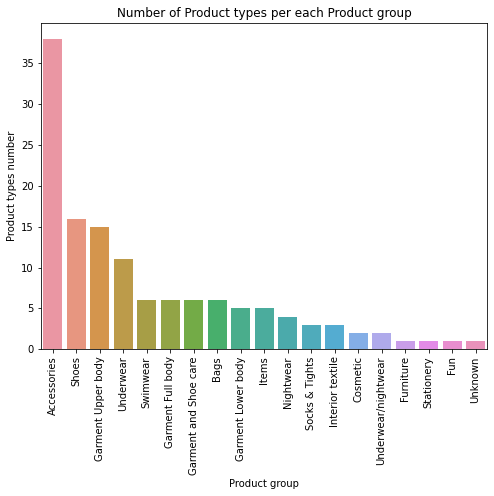

In [17]:
temp = articles.groupby(['product_group_name'])['product_type_name'].nunique()
df = pd.DataFrame({'Product group': temp.index,
                   'Product types number': temp.values
                  })
df = df.sort_values(['Product types number'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product types per each Product group')
s = sns.barplot(x = 'Product group', y='Product types number', data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

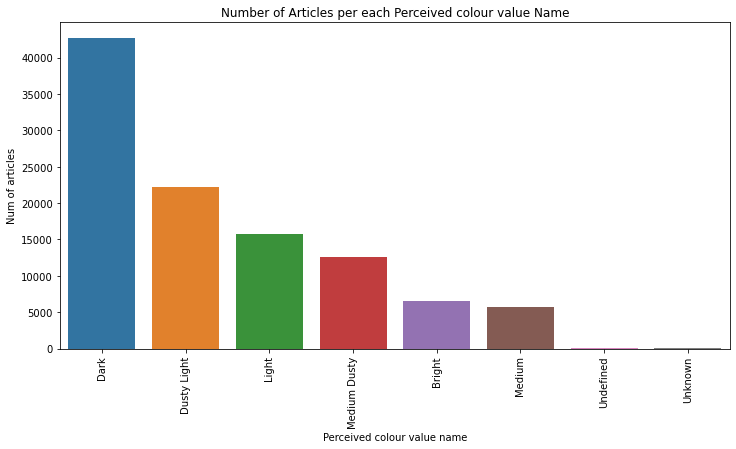

In [18]:
temp = articles.groupby(['perceived_colour_value_name'])['article_id'].nunique()
df = pd.DataFrame({'Perceived colour value name': temp.index,
                   'Num of articles': temp.values
                  })
df = df.sort_values(['Num of articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Perceived colour value Name')
s = sns.barplot(x = 'Perceived colour value name', y='Num of articles', data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

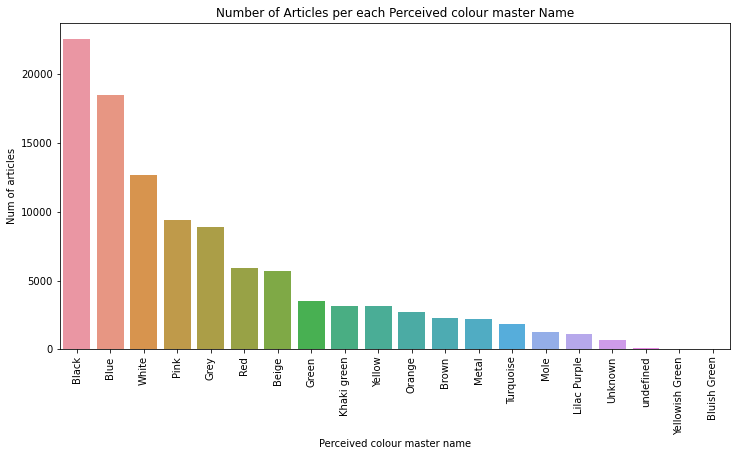

In [19]:
temp = articles.groupby(['perceived_colour_master_name'])['article_id'].nunique()
df = pd.DataFrame({'Perceived colour master name': temp.index,
                   'Num of articles': temp.values
                  })
df = df.sort_values(['Num of articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Perceived colour master Name')

s = sns.barplot(x = 'Perceived colour master name', y='Num of articles', data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

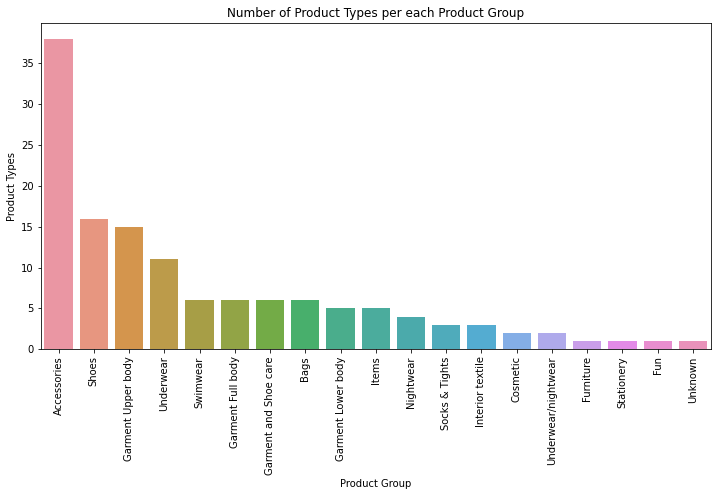

In [20]:
temp = articles2.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Product Types per each Product Group')

s = sns.barplot(x = 'Product Group', y='Product Types', data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

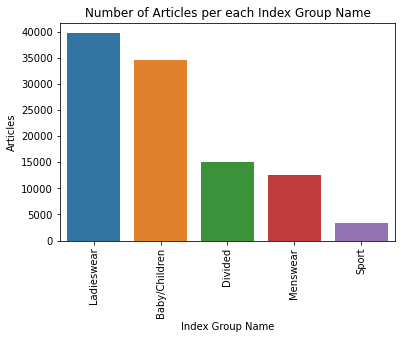

In [21]:
temp = articles2.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.title(f'Number of Articles per each Index Group Name')

s = sns.barplot(x = 'Index Group Name', y='Articles', data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

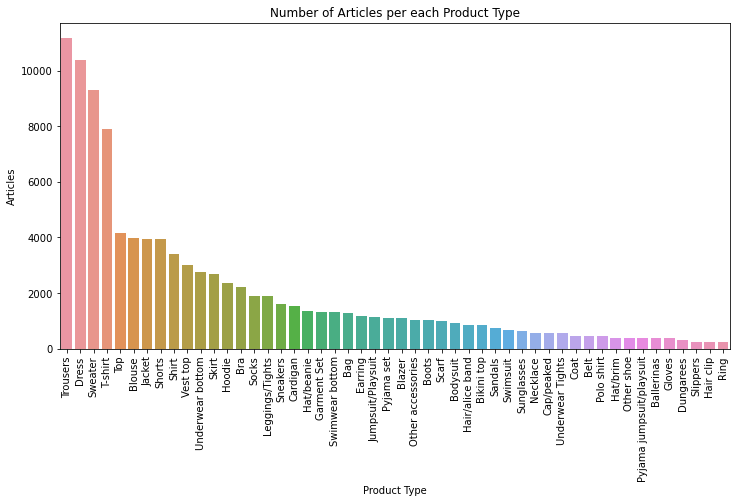

In [22]:
temp = articles2.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Product Type')

s = sns.barplot(x = 'Product Type', y='Articles', data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

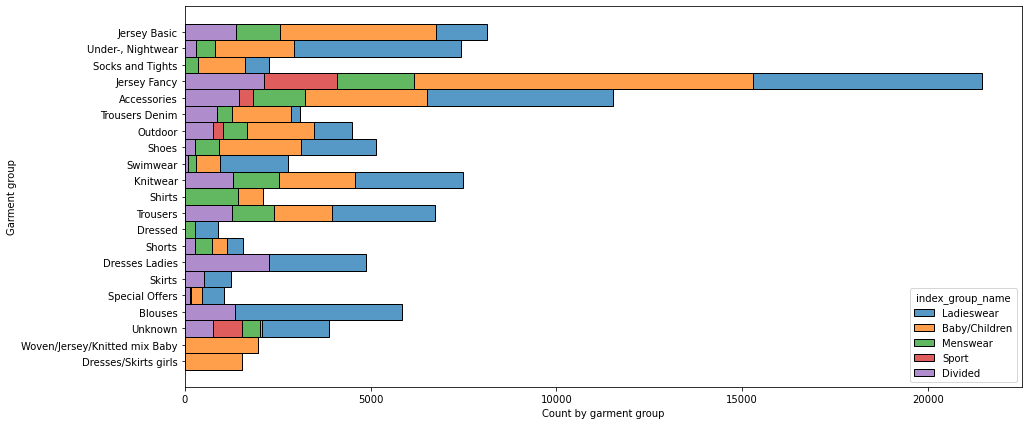

In [23]:
_, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles2, y='garment_group_name', color='orange', 
                  hue='index_group_name', multiple='stack')
ax.set_xlabel('Count by garment group')
ax.set_ylabel('Garment group')
plt.show()

## Customers data

In [24]:
customers = pd.read_csv('customers.csv.zip')
customers[:10]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


<ul>
<li>Cannot find how to read the postal_code in the given format --> plan to group based on city or country, but no luck trying to read it, so will drop 'postal_code'.</li>
<li>Seems like 'FN' = if a customer get Fashion News newsletter</li>
<li>Check if there is more value than 'Regulary' and 'NONE' -> if only these two then will drop 'fashion_news_frequency' as FN is already binary</li>
<li>Have check the value for both 'club_member_status and 'Active' first</li>
</ul>

In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [26]:
customers.shape

(1371980, 7)

In [27]:
# delete 'postal_code'
customers.drop('postal_code', axis= 1, inplace= True)
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0


In [28]:
customers.customer_id = customers.customer_id.apply(lambda x: int(x[-16:],16) ).astype('int64')
customers.target = customers.target.astype('int8')

print(f'There are {len(targets.customer_ID.unique())} unique short train targets')

AttributeError: 'DataFrame' object has no attribute 'target'

In [29]:
customers[:10]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,6883939031699146327,NaN,NaN,ACTIVE,NONE,49.0
1,-7200416642310594310,NaN,NaN,ACTIVE,NONE,25.0
2,-6846340800584936,NaN,NaN,ACTIVE,NONE,24.0
3,-94071612138601410,NaN,NaN,ACTIVE,NONE,54.0
4,-283965518499174310,1.0,1.0,ACTIVE,Regularly,52.0
5,-2477030216582433370,NaN,NaN,NaN,NaN,NaN
6,-3402710142238164438,NaN,NaN,ACTIVE,NONE,20.0
7,-8334631767138808638,1.0,1.0,ACTIVE,Regularly,32.0
8,5669685583838440396,NaN,NaN,ACTIVE,NONE,20.0
9,-6859984547830741869,NaN,NaN,ACTIVE,NONE,20.0


In [30]:
# Dealing with missing value
customers['FN'] = customers['FN'].fillna(0)
customers['Active'] = customers['Active'].fillna(0)

In [31]:
# Check for missing value
print(customers['club_member_status'].value_counts())
print('number of missing value =', customers['club_member_status'].isnull().sum())

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64
number of missing value = 6062


In [32]:
# Dealing with missing value
customers['club_member_status'] = customers['club_member_status'].fillna(customers['club_member_status'].mode()[0])
print(customers['club_member_status'].value_counts())
print('number of missing value =', customers['club_member_status'].isnull().sum())

ACTIVE        1278553
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64
number of missing value = 0


In [33]:
# Check for missing value
print(customers['fashion_news_frequency'].value_counts())
print('number of missing value =', customers['fashion_news_frequency'].isnull().sum())

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64
number of missing value = 16009


In [34]:
# Dealing with missing value
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('None', 'NONE')

# replacing missing value with mode
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna(customers['fashion_news_frequency'].mode()[0])

# Check for missing value
print(customers['fashion_news_frequency'].value_counts())
print('number of missing value =', customers['fashion_news_frequency'].isnull().sum())

NONE         893722
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64
number of missing value = 0


In [35]:
# Dealing with missing value
customers.dropna(axis = 0, inplace=True)
customers.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

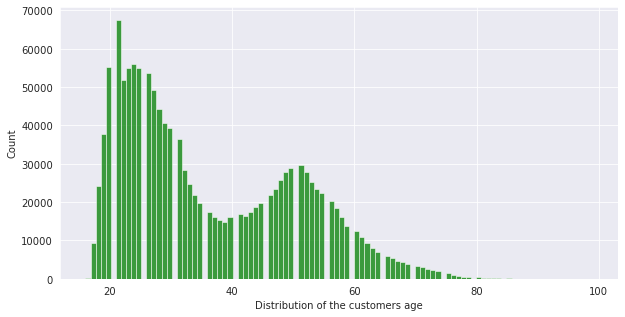

In [36]:
sns.set_style('darkgrid')

_, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=100, color='green')
ax.set_xlabel('Distribution of the customers age')
plt.show()

In [37]:
customers.to_csv('customers_short.csv.zip', index=False, compression={'method': 'zip', 'archive_name': 'train_labels_short.csv'})


In [38]:
import os

file_name1 = "customers.csv.zip"
file_name2 = "customers_short.csv.zip"

file_stats1 = os.stat(file_name1)
file_stats2 = os.stat(file_name2)
print(f'Size of customers.csv.zip: {file_stats1.st_size / (1024 * 1024)}')
print(f'Size of customers_short.csv.zip: {file_stats2.st_size / (1024 * 1024)}')

Size of customers.csv.zip: 95.3487377166748
Size of customers_short.csv.zip: 17.28482151031494


## Transactions data

In [39]:
transactions = pd.read_csv('transactions_train.csv.zip')

In [40]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [41]:
merged = transactions[['customer_id', 'article_id', 
                                   'price', 't_dat']].merge(articles[['article_id', 'prod_name', 
                                                                      'product_type_name', 'product_group_name', 
                                                                      'index_name']], on='article_id', how='left')

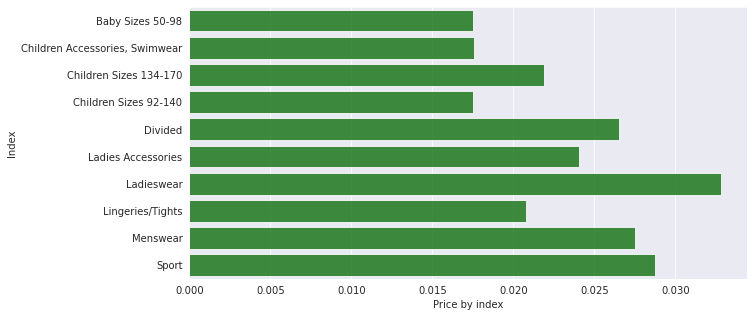

In [42]:
articles_index = merged[['index_name', 'price']].groupby('index_name').mean()
sns.set_style('darkgrid')
_, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='green', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

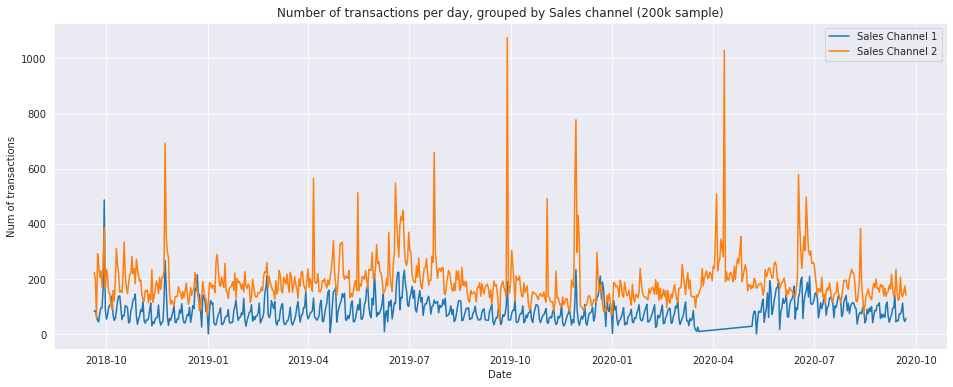

In [43]:
from datetime import datetime

grouped = transactions.sample(200000).groupby(['t_dat', 'sales_channel_id'])['article_id'].count().reset_index()
grouped['t_dat'] = grouped['t_dat'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

grouped.columns = ['Date', 'Sales Channel Id', "Transactions"]

_, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(grouped.loc[grouped['Sales Channel Id']==1, 'Date'], 
             grouped.loc[grouped['Sales Channel Id']==1, 'Transactions'], label='Sales Channel 1')

g2 = ax.plot(grouped.loc[grouped["Sales Channel Id"]==2, 'Date'], 
             grouped.loc[grouped["Sales Channel Id"]==2, 'Transactions'], label='Sales Channel 2')

plt.xlabel('Date')
plt.ylabel('Num of transactions')
ax.legend()
plt.title(f'Number of transactions per day, grouped by Sales channel (200k sample)')
plt.show()

In [44]:
transactions = transactions.sample(n=10000, random_state=0)

In [45]:
transactions.shape

(10000, 5)

In [46]:
base_path = ''

transactions_path = f'{base_path}transactions_train.csv.zip'
customers_path = f'{base_path}customers.csv.zip'
articles_path = f'{base_path}articles.csv.zip'

transactions = pd.read_csv(transactions_path, dtype={'article_id': str}, parse_dates=['t_dat'])

customers = pd.read_csv(customers_path)
articles = pd.read_csv(articles_path, dtype={'article_id': str})

ALL_USERS = customers['customer_id'].unique().tolist()
ALL_ITEMS = articles['article_id'].unique().tolist()

user_to_customer_map = {customer_id: user_id for user_id, customer_id in enumerate(ALL_USERS)}
item_to_article_map = {article_id: item_id for item_id, article_id in enumerate(ALL_ITEMS)}

del customers, articles

transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1


In [47]:
print(f'There are {len(ALL_USERS)} unique users the dataset.')
print(f'There are {len(ALL_ITEMS)} unique items the dataset.')

There are 1371980 unique users the dataset.
There are 105542 unique items the dataset.


In [48]:
START_DATE = '2020-08-21'

transactions_small = transactions[transactions['t_dat'] > START_DATE].copy()

In [49]:
transactions_small.loc[:,'user_id'] = transactions_small['customer_id'].map(user_to_customer_map)
transactions_small.loc[:,'item_id'] = transactions_small['article_id'].map(item_to_article_map)
transactions_small

,t_dat,customer_id,article_id,price,sales_channel_id,user_id,item_id
30597413,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0913688003,0.033881,2,38,103595
30597414,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0913688003,0.033881,2,38,103595
30597415,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0923460001,0.042356,2,38,104483
30597416,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0934380001,0.050831,2,38,105214
30597417,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,0913688001,0.033881,2,38,103593
...,...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,2,1371691,104961
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,2,1371691,100629
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1,1371721,104053
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1,1371747,88521


In [50]:
print(f'There are {len(transactions_small.user_id.unique())} unique users with purchases after {START_DATE}.')
print(f'There are {len(transactions_small.item_id.unique())} unique items in the smaller dataset.')

There are 256355 unique users with purchases after 2020-08-21.
There are 29548 unique items in the smaller dataset.


In [1]:
transactions['t_dat'].min(), transactions['t_dat'].max()

test_days = 30

test_cut = transactions['t_dat'].max() - pd.Timedelta(test_days)

train = transactions[transactions['t_dat'] < test_cut]
test = transactions[transactions['t_dat'] >= test_cut]

NameError: name 'transactions' is not defined

In [ ]:
from scipy.sparse import coo_matrix

users = transactions_small['user_id'].values
items = transactions_small['item_id'].values

purchases = np.ones(transactions_small.shape[0])

csr_train = coo_matrix((purchases, (users, items))).tocsr()
csr_train

In [ ]:
print(csr_train[0])

In [ ]:
pip install implicit

In [ ]:
%%time
from implicit.als import AlternatingLeastSquares

model = AlternatingLeastSquares(factors=7, iterations=2,
                                regularization=0.01, 
                                random_state=42)
model.fit(csr_train)

In [ ]:
from implicit.evaluation import mean_average_precision_at_k

map_12 = mean_average_precision_at_k(model, csr_train, csr_train, K=12, num_threads=4)
map_12

In [ ]:
user_id = 1019194
N = 12

recommendations = model.recommend(user_id, csr_train[user_id], N=N, filter_already_liked_items=False)
dict(zip(recommendations[0], recommendations[1]))

In [ ]:
item_id = 97632

related_items = model.similar_items(item_id, N=5)
dict(zip(related_items[0], related_items[1]))

In [ ]:
transactions_small.head()

In [ ]:
transactions_small_sales_1 = transactions_small[transactions_small['sales_channel_id']==1]

In [ ]:
transactions_small_sales_1.head()

In [ ]:
START_DATE = '2020-06-21'

transactions_small_sales_chanel_1 = transactions_small_sales_1[transactions_small_sales_1['t_dat'] > START_DATE].copy()

In [ ]:
transactions_small_sales_chanel_1.loc[:,'user_id'] = transactions_small_sales_chanel_1['customer_id'].map(user_to_customer_map)
transactions_small_sales_chanel_1.loc[:,'item_id'] = transactions_small_sales_chanel_1['article_id'].map(item_to_article_map)
transactions_small_sales_chanel_1

In [ ]:
print(f'There are {len(transactions_small_sales_chanel_1.user_id.unique())} unique users with purchases after {START_DATE}.')
print(f'There are {len(transactions_small_sales_chanel_1.item_id.unique())} unique items in the smaller dataset.')

In [ ]:
transactions['t_dat'].min(), transactions['t_dat'].max()

test_days = 90

test_cut = transactions['t_dat'].max() - pd.Timedelta(test_days)

train = transactions[transactions['t_dat'] < test_cut]
test = transactions[transactions['t_dat'] >= test_cut]

In [ ]:
from scipy.sparse import coo_matrix

users = transactions_small_sales_chanel_1['user_id'].values
items = transactions_small_sales_chanel_1['item_id'].values

purchases = np.ones(transactions_small_sales_chanel_1.shape[0])

csr_train = coo_matrix((purchases, (users, items))).tocsr()
csr_train

In [ ]:
print(csr_train[0])

In [ ]:
%%time
from implicit.als import AlternatingLeastSquares

model = AlternatingLeastSquares(factors=7, iterations=2,
                                regularization=0.01, 
                                random_state=42)
model.fit(csr_train)

In [ ]:
from implicit.evaluation import mean_average_precision_at_k

map_12 = mean_average_precision_at_k(model, csr_train, csr_train, K=12, num_threads=4)
map_12

In [ ]:
user_id = 1369338
N = 12

recommendations = model.recommend(user_id, csr_train[user_id], N=N, filter_already_liked_items=False)
dict(zip(recommendations[0], recommendations[1]))

In [ ]:
item_id = 81825

related_items = model.similar_items(item_id, N=5)
dict(zip(related_items[0], related_items[1]))

In [ ]:
transactions_small_sales_2 = transactions_small[transactions_small['sales_channel_id']==2]

In [ ]:
transactions_small_sales_2.head()

In [ ]:
START_DATE = '2020-06-21'

transactions_small_sales_chanel_2 = transactions_small_sales_2[transactions_small_sales_2['t_dat'] > START_DATE].copy()

In [ ]:
transactions_small_sales_chanel_2.loc[:,'user_id'] = transactions_small_sales_chanel_2['customer_id'].map(user_to_customer_map)
transactions_small_sales_chanel_2.loc[:,'item_id'] = transactions_small_sales_chanel_2['article_id'].map(item_to_article_map)
transactions_small_sales_chanel_2

In [ ]:
print(f'There are {len(transactions_small_sales_chanel_1.user_id.unique())} unique users with purchases after {START_DATE}.')
print(f'There are {len(transactions_small_sales_chanel_1.item_id.unique())} unique items in the smaller dataset.')